# Homework #6: Example Submission

Using the ideas we discussed today in class make an interactive map.

This assignment is fairly open ended, the only requirements are that you use geometric data & that there is at least one way in which the user can interact with your map (layers, colormap, data plotted, etc).  You are welcome to include your "steps" to a final visualization as well as a final visualization like data exploration and preliminary plotting -- this will also help us understand your thinking!  Please include 1-2 paragraphs explaining your visualization and the user interaction that you are implementing -- what are you trying to show?  What did you find interesting?  Who do you think would be interested in using this visualization?  

You are welcome to use `geopandas` and `ipywidgets` and the [Cambridge City GIS dataset](http://cambridgegis.github.io/gisdata.html) that we discussed to day in class, but you don't have to!  

If you would like to look for data to use from your local city (or county, state or country, or earth at large) please feel free to.  A tip to search for in a search engine like Google would be "CITY_NAME gis data" or "CITY_NAME GeoJSON".  To use the tools we went over in class today you'll want to make sure you are using GeoJSON files (sometimes you will see "shapefiles" or "topojson" formats -- you *can* use these formats but you might have to do some manipulation to get the data in the right format).

**Make sure you include your data so that we can run your notebook!** You can accomplish this by loading directly from a URL with `geopandas` or uploading your data with your homework submission and making sure you are linking to your data correctly in your notebook.

In [1]:
# import usual things & new packages we've been using:
import geopandas
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx # note: you do *not* have to use any basemaps if you don't want to!

In [6]:
commercial_districts = geopandas.read_file("https://raw.githubusercontent.com/cambridgegis/cambridgegis_data/master/Assessing/FY2020/FY2020_Commercial_Districts/ASSESSING_CommercialDistrictsFY2020.geojson")

In [7]:
commercial_districts

,DIST_NAME,GlobalID,DISTRICT,geometry
0,Neighborhood Cambridgeport,{AE4DFBDD-1E44-4E57-8051-5ABF8FD99C0B},4,"POLYGON ((-71.10969 42.35575, -71.10973 42.355..."
1,Harvard Square,{59011A75-4DB1-4CDB-84BC-B4AC988176A1},7,"POLYGON ((-71.11320 42.38272, -71.11296 42.382..."
2,Cambridge Triangle,{CAEB72E2-2845-44CE-AA7A-A22DE384BA3F},6,"POLYGON ((-71.11618 42.38586, -71.11610 42.385..."
3,Kendall Sq.,{AF8403C3-4D7E-4FDC-9801-E182CA7E357F},2,"POLYGON ((-71.09140 42.36940, -71.09111 42.369..."
4,Cambridge Triangle,{A2873BC6-C452-45E7-A240-2707228968BE},6,"POLYGON ((-71.10727 42.37809, -71.10416 42.375..."
5,East Cambridge,{BF6A498D-1A5F-4A4D-9F59-07A05532AEF4},1,"POLYGON ((-71.08146 42.37401, -71.08144 42.374..."
6,Alewife/West Cambridge,{7951E003-0AE0-4EB9-A084-A3471784B96F},10,"POLYGON ((-71.12664 42.37346, -71.12662 42.373..."
7,North Cambridge,{F39FFAE0-6780-4429-A84C-DD619D798205},9,"POLYGON ((-71.13637 42.40100, -71.13642 42.401..."
8,Central Square,{4759ECFF-65E2-4231-A2EC-238E950F9B31},5,"POLYGON ((-71.10962 42.37081, -71.10836 42.370..."
9,MIT,{6CF7C002-4A88-49A9-A843-899FE0B1E27F},3,"POLYGON ((-71.11065 42.35262, -71.11058 42.352..."


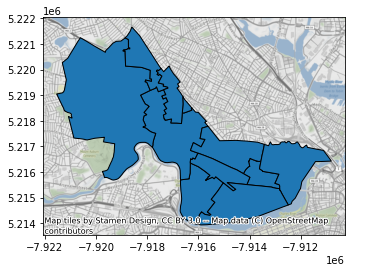

In [10]:
fig,ax=plt.subplots(1,1,figsize=(8,4))
commercial_districts = commercial_districts.to_crs(epsg=3857)
commercial_districts.plot(ax=ax)
commercial_districts.plot(ax=ax, edgecolor='black')
ctx.add_basemap(ax=ax)
plt.show()

In [59]:
days_list=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
shopping_list=['clothes','shoes','food','technology','accessories','plants','neccessities']
shopping_list2=['shoes','clothes','food','technology','accessories','plants','neccessities']
shopping_list3=['food','clothes','shoes','technology','accessories','plants','neccessities']
colors_list=['purple','red','orange','yellow','green','blue','pink']
@ipywidgets.interact(days=days_list,item2=shopping_list2,item3=shopping_list3,item=shopping_list,selected_color=colors_list)
def myMap(selected_color,days,item,item2,item3):
    fig, ax = plt.subplots(1,1,figsize=(8,4))
    commercial_districts.plot(ax=ax, color=selected_color, edgecolor='black')
    ctx.add_basemap(ax=ax)
    plt.show()
    print(days,':')
    print(item,',',item2, ',', 'and', item3)

interactive(children=(Dropdown(description='selected_color', options=('purple', 'red', 'orange', 'yellow', 'gr…

In [60]:
alpha_widget=ipywidgets.FloatSlider(value=0.5,min=0.3,max=0.7)

In [61]:
alpha_widget

FloatSlider(value=0.5, max=0.7, min=0.3)

In [62]:
@ipywidgets.interact(days=days_list,item2=shopping_list2,item3=shopping_list3,item=shopping_list,selected_color=colors_list,alpha=alpha_widget)
def myMap(selected_color,days,item,item2,item3,alpha):
    fig, ax = plt.subplots(1,1,figsize=(8,4))
    commercial_districts.plot(ax=ax, color=selected_color, edgecolor='black',alpha=alpha)
    ctx.add_basemap(ax=ax)
    plt.show()
    print(days,':')
    print(item,',',item2, ',', 'and', item3)

interactive(children=(Dropdown(description='selected_color', options=('purple', 'red', 'orange', 'yellow', 'gr…

My visualization shows the commercial districts in Cambridge. One detail of my visualization that interested me was the area of the districts since I did not expect the commercial districts to be so large. I was also surprised by the landmarks that the commercial district covered, including a lake. This is one of the reasons that I added transparency to the visualization to make sure the map underneath was visible. I suppose that anyone who is visiting or in the Cambridge area and is interested in the commercial districts of the town would be interested in using this visualization. Since shoppers might be interested in this visualization, I added a mini shopping list which the shopper can interact with.